In [40]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris

# Problem 1

In [41]:
#read the data sets
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [42]:
#prepare the data
data['classification']=iris.target
X=data.select_dtypes(['float']) 
y=data.classification
data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classification
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [43]:
data['classification'].unique()

array([0, 1, 2])

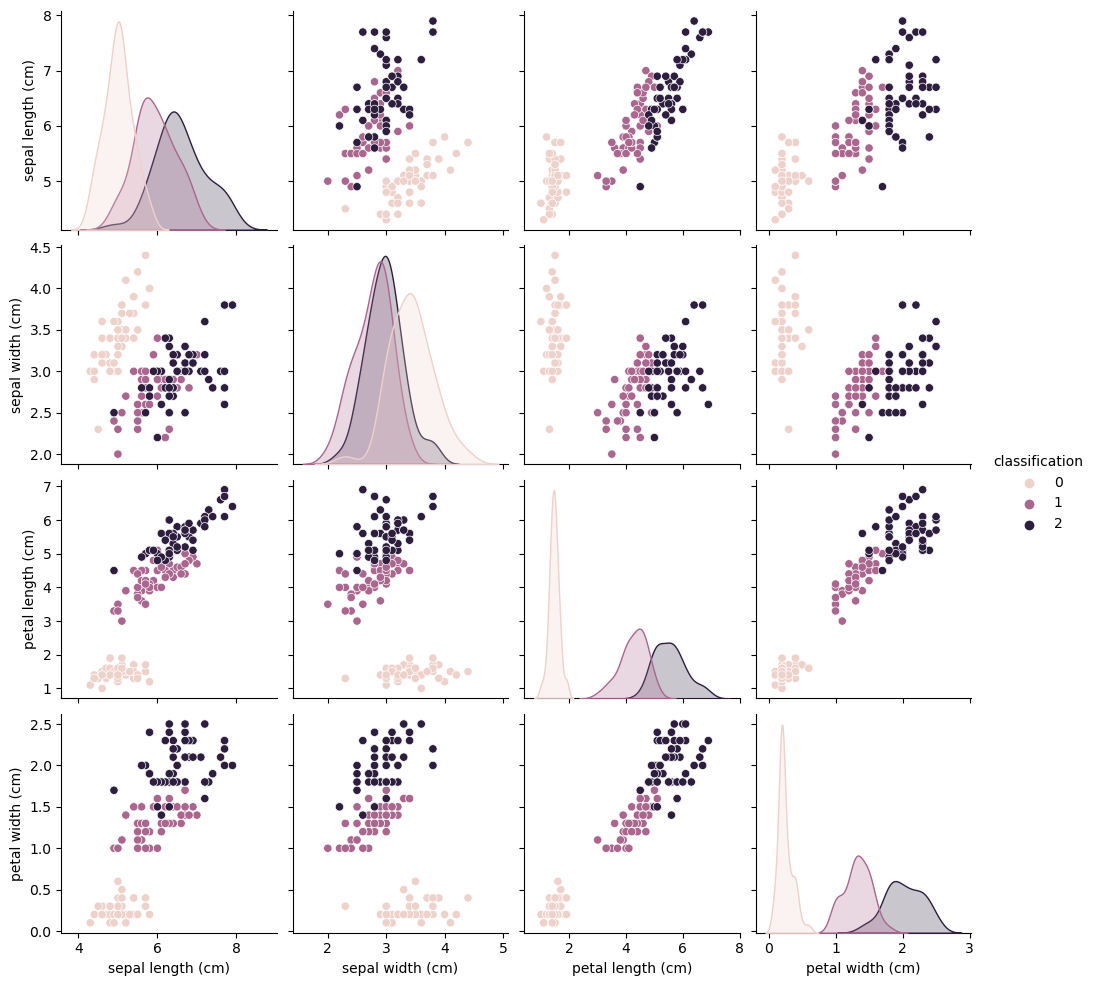

In [44]:
#data visualization
sns.pairplot(data=data, hue='classification')

In [45]:
#induce a set of binary trees
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)#train:test=8:2
models=[]
for depth in range(1,6):
    model=DecisionTreeClassifier(max_depth=depth, min_samples_leaf=2, min_samples_split=5).fit(X_train,y_train)
    tree=export_text(model,feature_names=list(X_train.columns))
    models.append(model)
    print(tree)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- class: 1

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- class: 1
|   |--- petal length (cm) >  4.75
|   |   |--- class: 2

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.55
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.55
|   |   |   |--- class: 1
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: 2

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.55
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.55
|   |   |   |--- class: 1
|   |--- petal length (cm) >  4.75
|   |   |--- petal width 

[Text(0.5, 0.75, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'), Text(0.25, 0.25, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'), Text(0.75, 0.25, 'gini = 0.5\nsamples = 80\nvalue = [0, 41, 39]')]


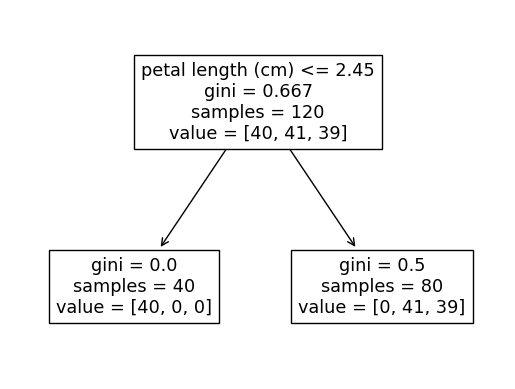

In [46]:
treePlot=plot_tree(models[0],feature_names=list(X_train.columns), filled = False)
print(treePlot)

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'), Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'), Text(0.6, 0.5, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'), Text(0.4, 0.16666666666666666, 'gini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'), Text(0.8, 0.16666666666666666, 'gini = 0.206\nsamples = 43\nvalue = [0, 5, 38]')]


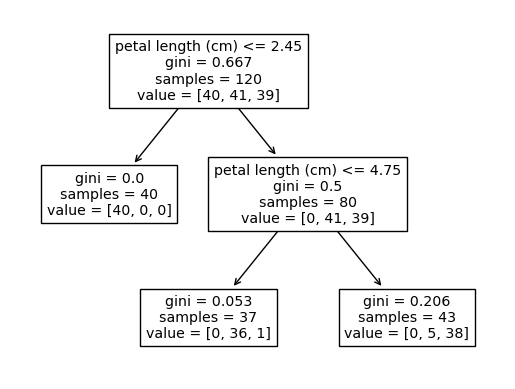

In [47]:
treePlot=plot_tree(models[1],feature_names=list(X_train.columns), filled = False)
print(treePlot)

[Text(0.375, 0.875, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'), Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'), Text(0.5, 0.625, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'), Text(0.25, 0.375, 'petal width (cm) <= 1.55\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'), Text(0.125, 0.125, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'), Text(0.375, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'), Text(0.75, 0.375, 'petal width (cm) <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'), Text(0.625, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'), Text(0.875, 0.125, 'gini = 0.056\nsamples = 35\nvalue = [0, 1, 34]')]


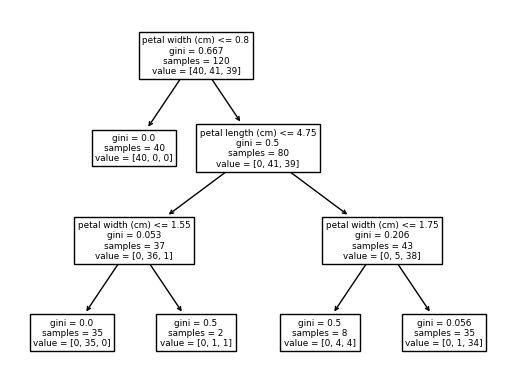

In [48]:
treePlot=plot_tree(models[2],feature_names=list(X_train.columns), filled = False)
print(treePlot)

[Text(0.3181818181818182, 0.9, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'), Text(0.22727272727272727, 0.7, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'), Text(0.4090909090909091, 0.7, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'), Text(0.18181818181818182, 0.5, 'petal width (cm) <= 1.55\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'), Text(0.09090909090909091, 0.3, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'), Text(0.2727272727272727, 0.3, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'), Text(0.6363636363636364, 0.5, 'petal width (cm) <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'), Text(0.45454545454545453, 0.3, 'petal length (cm) <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'), Text(0.36363636363636365, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'), Text(0.5454545454545454, 0.1, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'), Text(0.8181818181818182, 0.3, 'petal length (cm) <= 4.85\ngini = 0.05

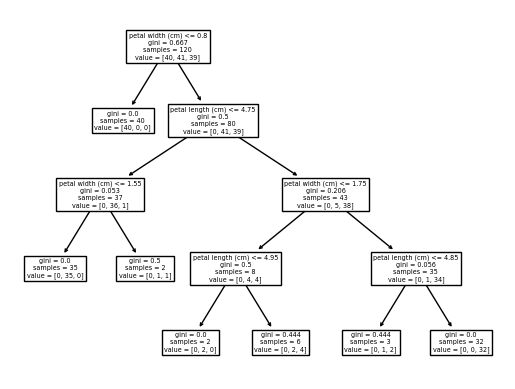

In [49]:
treePlot=plot_tree(models[3],feature_names=list(X_train.columns), filled = False)
print(treePlot)

[Text(0.3181818181818182, 0.9166666666666666, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'), Text(0.22727272727272727, 0.75, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'), Text(0.4090909090909091, 0.75, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'), Text(0.18181818181818182, 0.5833333333333334, 'petal width (cm) <= 1.55\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'), Text(0.09090909090909091, 0.4166666666666667, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'), Text(0.2727272727272727, 0.4166666666666667, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'), Text(0.6363636363636364, 0.5833333333333334, 'petal width (cm) <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'), Text(0.45454545454545453, 0.4166666666666667, 'petal length (cm) <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'), Text(0.36363636363636365, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'), Text(0.5454545454545454, 0.25, 'petal width (cm) <= 1

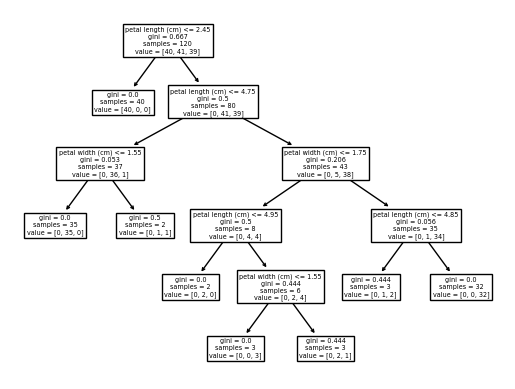

In [50]:
treePlot=plot_tree(models[4],feature_names=list(X_train.columns), filled = False)
print(treePlot)

In [51]:
#recall
from sklearn.metrics import recall_score, precision_score, f1_score
for depth in range(1,6):
    y_pred=models[depth-1].predict(X_test)
    recall = recall_score(y_test, y_pred, average='macro')
    print(f"depth={depth}, recall={recall}\n")

depth=1, recall=0.6666666666666666

depth=2, recall=0.9629629629629629

depth=3, recall=1.0

depth=4, recall=1.0

depth=5, recall=1.0



In [52]:
#precision
for depth in range(1,6):
    y_pred=models[depth-1].predict(X_test)
    precision=precision_score(y_test, y_pred, average='macro')
    print(f"depth={depth}, precision={recall}\n")

depth=1, precision=1.0

depth=2, precision=1.0

depth=3, precision=1.0

depth=4, precision=1.0

depth=5, precision=1.0



D:\A\aboutAna\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
depth=1
y_pred=models[depth-1].predict(X_test)
precision=precision_score(y_test, y_pred, average='macro')
print(f"depth={depth}, precision={recall}\n")

depth=1, precision=1.0



D:\A\aboutAna\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
depth=2
y_pred=models[depth-1].predict(X_test)
precision=precision_score(y_test, y_pred, average='macro')
print(f"depth={depth}, precision={recall}\n")

depth=2, precision=1.0



In [55]:
depth=3
y_pred=models[depth-1].predict(X_test)
precision=precision_score(y_test, y_pred, average='macro')
print(f"depth={depth}, precision={recall}\n")

depth=3, precision=1.0



In [56]:
depth=4
y_pred=models[depth-1].predict(X_test)
precision=precision_score(y_test, y_pred, average='macro')
print(f"depth={depth}, precision={recall}\n")

depth=4, precision=1.0



In [57]:
depth=5
y_pred=models[depth-1].predict(X_test)
precision=precision_score(y_test, y_pred, average='macro')
print(f"depth={depth}, precision={recall}\n")

depth=5, precision=1.0



In [58]:
#f1 score
for depth in range(1,6):
    y_pred=models[depth-1].predict(X_test)
    f1=f1_score(y_test, y_pred, average='macro')
    print(f"depth={depth}, f1={recall}\n")

depth=1, f1=1.0

depth=2, f1=1.0

depth=3, f1=1.0

depth=4, f1=1.0

depth=5, f1=1.0



# Problem 2

In [59]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [60]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [61]:
X

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [62]:
data_1=pd.concat([X, y], axis=1)
data_1

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [63]:
data_1['Diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [64]:
#induce a binary decision tree
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) #train:test=8:2

model = DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=5, criterion='gini').fit(X_train, y_train)
tree=export_text(model,feature_names=list(X_train.columns))
print(tree)

|--- concave_points1 <= 0.05
|   |--- radius3 <= 16.83
|   |   |--- class: B
|   |--- radius3 >  16.83
|   |   |--- class: M
|--- concave_points1 >  0.05
|   |--- concave_points3 <= 0.15
|   |   |--- class: B
|   |--- concave_points3 >  0.15
|   |   |--- class: M



[Text(0.5, 0.8333333333333334, 'concave_points1 <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [286, 169]'), Text(0.25, 0.5, 'radius3 <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [266, 16]'), Text(0.125, 0.16666666666666666, 'gini = 0.037\nsamples = 263\nvalue = [258, 5]'), Text(0.375, 0.16666666666666666, 'gini = 0.488\nsamples = 19\nvalue = [8, 11]'), Text(0.75, 0.5, 'concave_points3 <= 0.147\ngini = 0.204\nsamples = 173\nvalue = [20, 153]'), Text(0.625, 0.16666666666666666, 'gini = 0.5\nsamples = 35\nvalue = [18, 17]'), Text(0.875, 0.16666666666666666, 'gini = 0.029\nsamples = 138\nvalue = [2, 136]')]


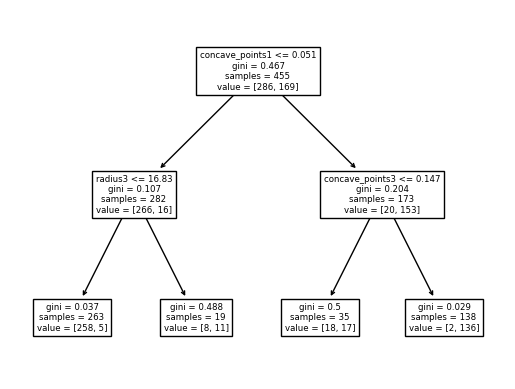

In [65]:
treePlot=plot_tree(model,feature_names=list(X_train.columns), filled = False)
print(treePlot)

In [66]:
entropy_father=-(286/455)*np.log2(286/455)-(169/455)*np.log2(169/455)
entropy_left=-(266/282)*np.log2(266/282)-(16/282)*np.log2(16/282)
entropy_right=-(20/173)*np.log2(20/173)-(153/173)*np.log2(153/173)
entropy_son=(286/455)*entropy_left+(173/455)*entropy_right
gain=entropy_father-entropy_son
print(f"The entropy of the father:{entropy_father}")
print(f"The entropy of the left son:{entropy_left}")
print(f"The entropy of the right son:{entropy_right}")
print(f"The entropy of the sons:{entropy_son}")
print(f"The information gain:{gain}")

The entropy of the father:0.9517626756348311
The entropy of the left son:0.31435586359270684
The entropy of the right son:0.5165998933608694
The entropy of the sons:0.39401661217350453
The information gain:0.5577460634613265


In [67]:
gini_father=0.467
gini_left=0.107
gini_right=0.204
gini_son=(286/455)*gini_left+(173/455)*gini_right
gain=gini_father-gini_son
print(f"The gini index of the father:{gini_father}")
print(f"The gini index of the sons:{gini_son}")
print(f"The information gain:{gain}")

The gini index of the father:0.467
The gini index of the sons:0.144821978021978
The information gain:0.32217802197802203


In [68]:
misclass_father=1-max(286/455,169/455)
misclass_left=1-max(266/282,16/282)
misclass_right=1-max(20/173,153/173)
misclass_son=(286/455)*misclass_left+(173/455)*misclass_right
gain=misclass_father-misclass_son
print(f"The misclassification error of the father:{misclass_father}")
print(f"The misclassification error of the sons:{misclass_son}")
print(f"The information gain:{gain}")

The misclassification error of the father:0.37142857142857144
The misclassification error of the sons:0.07961967110903281
The information gain:0.29180890031953866


# Problem 3

In [114]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [115]:
from sklearn.decomposition import PCA

#first principal
pca=PCA(n_components=1) 
X_pca_1=pca.fit_transform(X)

#second principal
pca=PCA(n_components=2)
X_pca_2=pca.fit_transform(X)

In [121]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
X_pca_1_train, X_pca_1_test, y_pca_1_train, y_pca_1_test=train_test_split(X_pca_1, y, test_size=0.2, random_state=42)
X_pca_2_train, X_pca_2_test, y_pca_2_train, y_pca_2_test=train_test_split(X_pca_2, y, test_size=0.2, random_state=42)

models=[]
x_tests=[]
x_tests.append(X_test)
x_tests.append(X_pca_1_test)
x_tests.append(X_pca_2_test)
y_tests=[]
y_tests.append(y_test)
y_tests.append(y_pca_1_test)
y_tests.append(y_pca_2_test)

model_original= DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5, max_depth=2).fit(X_train, y_train)
models.append(model_original)
tree=export_text(model_original,feature_names=list(X_train.columns))
print(tree)

|--- concave_points1 <= 0.05
|   |--- radius3 <= 16.83
|   |   |--- class: B
|   |--- radius3 >  16.83
|   |   |--- class: M
|--- concave_points1 >  0.05
|   |--- concave_points3 <= 0.15
|   |   |--- class: B
|   |--- concave_points3 >  0.15
|   |   |--- class: M



[Text(0.5, 0.8333333333333334, 'concave_points1 <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [286, 169]'), Text(0.25, 0.5, 'radius3 <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [266, 16]'), Text(0.125, 0.16666666666666666, 'gini = 0.037\nsamples = 263\nvalue = [258, 5]'), Text(0.375, 0.16666666666666666, 'gini = 0.488\nsamples = 19\nvalue = [8, 11]'), Text(0.75, 0.5, 'concave_points3 <= 0.147\ngini = 0.204\nsamples = 173\nvalue = [20, 153]'), Text(0.625, 0.16666666666666666, 'gini = 0.5\nsamples = 35\nvalue = [18, 17]'), Text(0.875, 0.16666666666666666, 'gini = 0.029\nsamples = 138\nvalue = [2, 136]')]


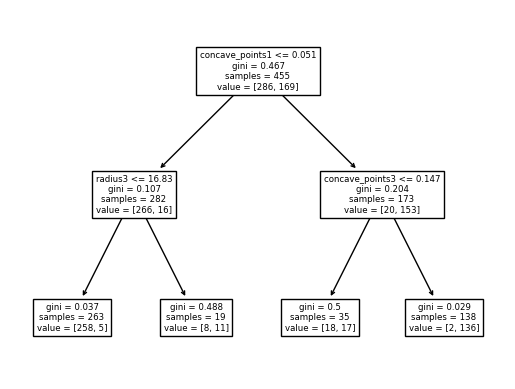

In [122]:
treePlot=plot_tree(model_original,feature_names=list(X_train.columns), filled = False)
print(treePlot)

In [123]:
model_1= DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5, max_depth=2).fit(X_pca_1_train, y_pca_1_train)
models.append(model_1)
tree = export_text(model_1, feature_names=['PC1'])
print(tree)

|--- PC1 <= 41.65
|   |--- PC1 <= -196.67
|   |   |--- class: B
|   |--- PC1 >  -196.67
|   |   |--- class: B
|--- PC1 >  41.65
|   |--- PC1 <= 260.35
|   |   |--- class: M
|   |--- PC1 >  260.35
|   |   |--- class: M



[Text(0.5, 0.8333333333333334, 'PC1 <= 41.653\ngini = 0.467\nsamples = 455\nvalue = [286, 169]'), Text(0.25, 0.5, 'PC1 <= -196.667\ngini = 0.203\nsamples = 314\nvalue = [278, 36]'), Text(0.125, 0.16666666666666666, 'gini = 0.065\nsamples = 237\nvalue = [229, 8]'), Text(0.375, 0.16666666666666666, 'gini = 0.463\nsamples = 77\nvalue = [49, 28]'), Text(0.75, 0.5, 'PC1 <= 260.355\ngini = 0.107\nsamples = 141\nvalue = [8, 133]'), Text(0.625, 0.16666666666666666, 'gini = 0.327\nsamples = 34\nvalue = [7, 27]'), Text(0.875, 0.16666666666666666, 'gini = 0.019\nsamples = 107\nvalue = [1, 106]')]


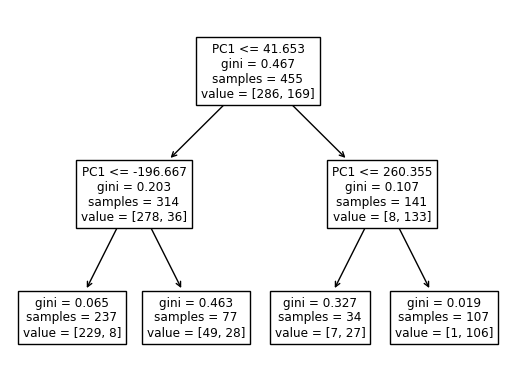

In [124]:
treePlot = plot_tree(model_1, feature_names=['PC1'], filled=False)
print(treePlot)

In [125]:
model_2= DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5, max_depth=2).fit(X_pca_2_train, y_pca_2_train)
models.append(model_2)
tree=export_text(model_2,feature_names=['PC1','PC2'])
print(tree)

|--- PC1 <= 41.65
|   |--- PC1 <= -196.67
|   |   |--- class: B
|   |--- PC1 >  -196.67
|   |   |--- class: B
|--- PC1 >  41.65
|   |--- PC1 <= 260.35
|   |   |--- class: M
|   |--- PC1 >  260.35
|   |   |--- class: M



[Text(0.5, 0.8333333333333334, 'PC1 <= 41.653\ngini = 0.467\nsamples = 455\nvalue = [286, 169]'), Text(0.25, 0.5, 'PC1 <= -196.667\ngini = 0.203\nsamples = 314\nvalue = [278, 36]'), Text(0.125, 0.16666666666666666, 'gini = 0.065\nsamples = 237\nvalue = [229, 8]'), Text(0.375, 0.16666666666666666, 'gini = 0.463\nsamples = 77\nvalue = [49, 28]'), Text(0.75, 0.5, 'PC1 <= 260.355\ngini = 0.107\nsamples = 141\nvalue = [8, 133]'), Text(0.625, 0.16666666666666666, 'gini = 0.327\nsamples = 34\nvalue = [7, 27]'), Text(0.875, 0.16666666666666666, 'gini = 0.019\nsamples = 107\nvalue = [1, 106]')]


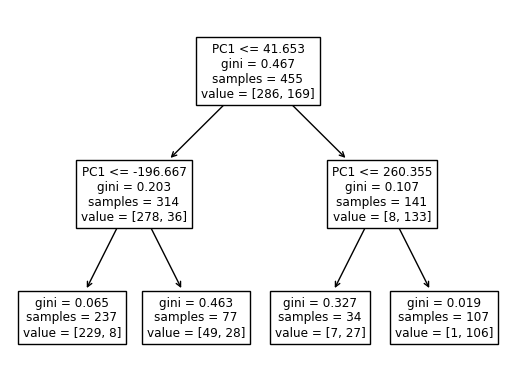

In [126]:
treePlot = plot_tree(model_2, feature_names=['PC1','PC2'], filled=False)
print(treePlot)

In [129]:
f1_scores = []
precisions = []
recalls = []
for i in range(3):
    X_test_i = x_tests[i]
    y_test_i = y_tests[i]
    if isinstance(X_test_i, pd.DataFrame):
        X_test_i = X_test_i.values
    if isinstance(y_test_i, pd.Series):
        y_test_i = y_test_i.values
    
    y_pred = models[i].predict(X_test_i)
    
    f1 = f1_score(y_test_i, y_pred, pos_label='M')
    precision = precision_score(y_test_i, y_pred, pos_label='M')
    recall = recall_score(y_test_i, y_pred, pos_label='M')
    
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)

for i in range(3):
    print(f"model：{i+1}:")
    print(f"F1 score:{f1_scores[i]:.2f}")
    print(f"Accuraacy:{precisions[i]:.2f}")
    print(f"Recall:{recalls[i]:.2f}\n")

model：1:
F1 score:0.90
Accuraacy:0.95
Recall:0.86

model：2:
F1 score:0.92
Accuraacy:1.00
Recall:0.86

model：3:
F1 score:0.92
Accuraacy:1.00
Recall:0.86



D:\A\aboutAna\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [130]:
from sklearn.metrics import confusion_matrix

fps = []
tps = []
fprs = []
tpRs = []

for i in range(3):
    y_pred = models[i].predict(x_tests[i])
    cm = confusion_matrix(y_tests[i], y_pred, labels=['B', 'M'])
    
    TN, FP, FN, TP = cm.ravel()
    FPR = FP / (FP + TN)
    TPR = TP / (TP + FN)
    
    fps.append(FP)
    tps.append(TP)
    fprs.append(FPR)
    tpRs.append(TPR)

for i in range(3):
    print(f"Model {i+1}:")
    print(f"False Positives (FP): {fps[i]}")
    print(f"True Positives (TP): {tps[i]}")
    print(f"False Positive Rate (FPR): {fprs[i]:.2f}")
    print(f"True Positive Rate (TPR): {tpRs[i]:.2f}\n")

Model 1:
False Positives (FP): 2
True Positives (TP): 37
False Positive Rate (FPR): 0.03
True Positive Rate (TPR): 0.86

Model 2:
False Positives (FP): 0
True Positives (TP): 37
False Positive Rate (FPR): 0.00
True Positive Rate (TPR): 0.86

Model 3:
False Positives (FP): 0
True Positives (TP): 37
False Positive Rate (FPR): 0.00
True Positive Rate (TPR): 0.86

